In [1]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from fytok.Tokamak import Tokamak
from fytok.utils.load_scenario import load_scenario
from fytok.utils.plot_profiles import plot_profiles, sp_figure
import scipy.constants
from spdm.data.Expression import Variable
from spdm.data.File import File
from spdm.utils.logger import logger
import freegs


2023-06-20 09:25:48,175 INFO [spdm] : Set mapping path: /home/salmon/workspace/fytok/python/fytok/_mapping


In [2]:
scenario = load_scenario("/home/salmon/workspace/data/15MA inductive - burn")
tok = Tokamak("ITER",
              name=scenario["name"],
              description=scenario["description"],
              core_profiles={**scenario["core_profiles"],
                             "$default_value": {"profiles_1d": {"grid": {
                                 "rho_tor_norm": np.linspace(0, 1.0, 100),
                                 "psi": np.linspace(0, 1.0, 100),
                                 "psi_magnetic_axis": 0.0,
                                 "psi_boundary": 1.0,
                             }}}
                             },
              equilibrium={**scenario["equilibrium"],
                           "code": {"name":  "freegs", "parameters": {"boundary": "fixed"}},
                           "$default_value": {"time_slice": {
                               "boundary": {"psi_norm": 0.99},
                               "coordinate_system": {"grid": {"dim1": 256, "dim2": 128}}
                           }}}
              )


2023-06-20 09:25:49,841 INFO [spdm] : Load scenario/profiles from /home/salmon/workspace/data/15MA inductive - burn/15MA Inductive at burn-ASTRA.xls
2023-06-20 09:25:49,976 INFO [spdm] : Load module spdm.plugins.data.PluginGEQdsk from /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginGEQdsk.py
2023-06-20 09:25:49,978 DEBUG [spdm] /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginGEQdsk.py:329:__init__: Open File URITuple(protocol='local', authority='', path=PosixPath('/home/salmon/workspace/data/15MA inductive - burn/Increased domain R-Z/Medium resolution - 129x257/g900003.00230_ITER_15MA_eqdsk16VVMR.txt'), query=None, fragment='', format='', schema='') mode=Mode.read
2023-06-20 09:25:50,003 INFO [spdm] : Load scenario/equilibrium from /home/salmon/workspace/data/15MA inductive - burn/Increased domain R-Z/Medium resolution - 129x257/g900003.00230_ITER_15MA_eqdsk16VVMR.txt
2023-06-20 09:25:50,016 INFO [spdm] : Load module spdm.plugins.data.PluginXML from /home/salmon/w

2023-06-20 09:25:53,189 INFO [spdm] : Load module spdm.plugins.views.MatplotlibView from /home/salmon/workspace/SpDB/python/spdm/plugins/views/MatplotlibView.py
2023-06-20 09:25:53,400 INFO [spdm] : Load module fytok.plugins.equilibrium.freegs from /home/salmon/workspace/fytok_modules/python/fytok/plugins/equilibrium/freegs.py
2023-06-20 09:25:53,403 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/plugins/equilibrium/eq_analyze.py:110:__init__: Create MagneticCoordSystem.
2023-06-20 09:25:53,405 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/plugins/equilibrium/eq_analyze.py:126:__init__: COCOS=5
2023-06-20 09:25:53,408 INFO [spdm] : Load module spdm.mesh.RectangularMesh from /home/salmon/workspace/SpDB/python/spdm/mesh/RectangularMesh.py


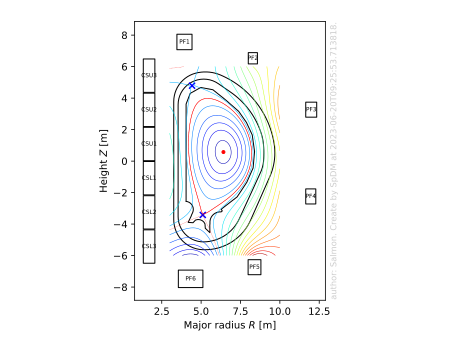

In [3]:
display(tok)